Interpolation overview

1D:
- Mean
- Nearest Neighbour
- Linear Interpolation
- (higher degree polynomials)

2D:
- Mean
- Nearest Neighbor
- (Inverse distance)
- (Kriging)


In [2]:
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

(0.0, 10.0)

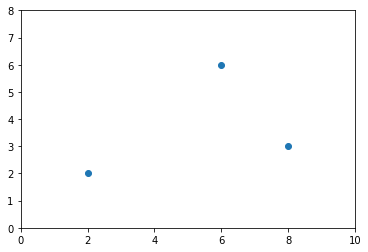

In [3]:
# Lets start with distribution from lecture (3 points in 1D)
x = np.array([2,6,8])
y = np.array([2,6,3])

plt.scatter(x,y)
plt.ylim(0,8)
plt.xlim(0,10)

In [4]:
def interactvie_1d_interpolation(x_mid=4,y_mid=6):
    
    x = np.array([2,x_mid,8])
    y = np.array([2,y_mid,3])
    
    f0 = np.mean(y)
    f1 = interp1d(x, y)
    f2 = interp1d(x, y, kind='nearest')

    xnew = np.linspace(2, 8, num=100, endpoint=True)

    plt.figure(figsize=(10,8))
    
    plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, np.zeros((len(xnew)))+f0, ':')
    plt.legend(['data', 'linear', 'nearest', 'average'], loc='best')
    plt.ylim(0,8)
    plt.xlim(1.5,8.5)
    plt.show()

In [5]:
widgets.interact(interactvie_1d_interpolation, x_mid=(2.1,7.9,0.1), y_mid=(0.2,7.8,0.1));

interactive(children=(FloatSlider(value=4.0, description='x_mid', max=7.9, min=2.1), FloatSlider(value=6.0, de…

In [6]:
# 2d - inverse distance still missing

def interactvie_2d_interpolation(x_mid=5,y_mid=5):
    
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    
    grid_x, grid_y = np.mgrid[0:10:1000j, 0:10:1000j]
    
    x = np.array([2,x_mid,8,3])
    y = np.array([2,y_mid,3,8])
    points = np.array((x,y)).swapaxes(0,1)
    values = np.array([1,2,3,4])
    
    grid_z0 = np.zeros((len(grid_x), len(grid_y)))+np.mean(values)
    grid_z1 = griddata(points, values, (grid_x, grid_y), method='nearest')
    grid_z2 = griddata(points, values, (grid_x, grid_y), method='linear')

    axs[0].imshow(grid_z0, extent=(0,10,0,10), origin='lower')
    axs[0].scatter(points[:,0], points[:,1], c="black", s=10)
    axs[0].scatter(x_mid, y_mid, c="red", s=15)
    axs[0].set(title="Mean", ylim=(0,10), xlim=(0,10))
    
    axs[1].imshow(grid_z1.T, extent=(0,10,0,10), origin='lower')
    axs[1].scatter(points[:,0], points[:,1], c="black", s=10)
    axs[1].scatter(x_mid, y_mid, c="red", s=15)
    axs[1].set(title="Nearest Neighbor", ylim=(0,10), xlim=(0,10))
    
    # Invere distance still missing
    #c = axs[2].imshow(grid_z2.T, extent=(0,10,0,10), origin='lower')
    #axs[2].scatter(points[:,0], points[:,1], c="black", s=10)
    #axs[2].set(title="Linear", ylim=(0,10), xlim=(0,10))
    #plt.colorbar()
    
    plt.show()

In [7]:
widgets.interact(interactvie_2d_interpolation, x_mid=(1,9,0.1), y_mid=(1,9,0.1));

interactive(children=(FloatSlider(value=5.0, description='x_mid', max=9.0, min=1.0), FloatSlider(value=5.0, de…